# **Cinemática de un robot planar**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

## Importar librerias

In [35]:
import numpy as np
from sympy import*
init_printing()

## Se crean variables simbólicas

In [36]:
## Variables Simbolicas
theta_1 = symbols("theta_1",  real=True)
theta_2 = symbols("theta_2",  real=True)
l_1 = symbols("l_1",  real=True)
l_2 = symbols("l_2",  real=True)

## Transformación desde el estado 0 al estado 1

In [37]:
_0H1 = Matrix([[cos(theta_1), -sin(theta_1), 0, 0], [sin(theta_1), cos(theta_1), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [38]:
_0H1


⎡cos(θ₁)  -sin(θ₁)  0  0⎤
⎢                       ⎥
⎢sin(θ₁)  cos(θ₁)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 1 al estado 2

In [39]:
_1H2 = Matrix([[1, 0, 0, l_1], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [40]:
_1H2

⎡1  0  0  l₁⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Transformación desde el estado 2 al estado 3

In [41]:
_2H3 = Matrix([[cos(theta_2), -sin(theta_2), 0, 0], [sin(theta_2), cos(theta_2), 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [42]:
_2H3

⎡cos(θ₂)  -sin(θ₂)  0  0⎤
⎢                       ⎥
⎢sin(θ₂)  cos(θ₂)   0  0⎥
⎢                       ⎥
⎢   0        0      1  0⎥
⎢                       ⎥
⎣   0        0      0  1⎦

## Transformación desde el estado 3 al estado 4

In [43]:
_3H4 = Matrix([[1, 0, 0, l_2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

In [44]:
_3H4


⎡1  0  0  l₂⎤
⎢           ⎥
⎢0  1  0  0 ⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

## Composición de cada estado de la cinemática

In [45]:
H = simplify(_0H1@_1H2@_2H3@_3H4)

In [46]:
H

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

## Posición del efector final

In [47]:
P = H[0:2, 3]

In [48]:
P

⎡l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                            ⎥
⎣l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎦

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def dibujar_brazo_mecanico(theta1, theta2, l1, l2):
  """Función para dibujar un brazo mecanico con 2 grados de libertad.

  Parametros:
    theta1: Angulo de la primera articulacion en radianes.
    theta2: Angulo de la segunda articulacion en radianes.
    l1: Longitud del primer extremo
    l2: Longitud del segundo extremo
  """

  # Calculamos la posición del efector final
  x1 = l1 * np.cos(theta1)
  y1 = l1 * np.sin(theta1)
  x2 = x1 + l2 * np.cos(theta1 + theta2)
  y2 = y1 + l2 * np.sin(theta1 + theta2)

  # Dibujando el brazo con lineas y puntos
  plt.figure(figsize=(6, 6))
  plt.plot([0, x1], [0, y1], 'b-', linewidth=5)  # First link
  plt.plot([x1, x2], [y1, y2], 'b-', linewidth=5)  # Second link
  plt.plot(0, 0, 'ro', markersize=10)  # Base
  plt.plot(x2, y2, 'go', markersize=10)  # End-effector

  # Se dibujan los límites y los labels
  plt.xlim([-l1 - l2, l1 + l2])
  plt.ylim([-l1 - l2, l1 + l2])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Brazo robótico')
  plt.grid(True)
  plt.show()

## Ejemplo de manipulación del brazo robotico en su estado final

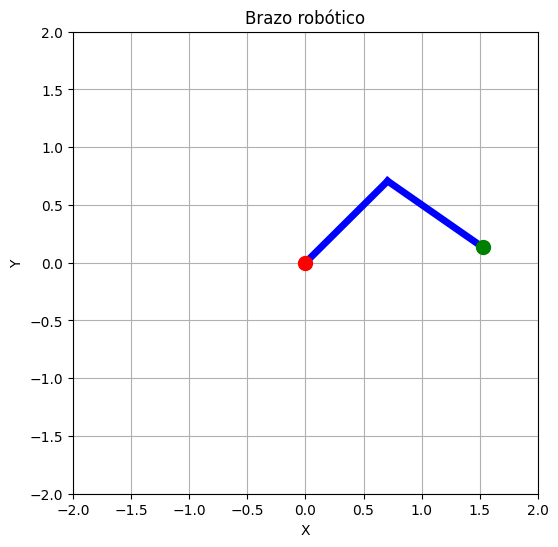

In [50]:
theta1 = np.deg2rad(45)  # 45 grados
theta2 = np.deg2rad(-80)  # -30 grados
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

## **Taller**

*  Dibujar cada estado del anterior brazo robótico
*  Imagine un brazo robótico cuyas extremidades miden 2 unidades cada una. Podría este brazo alcanzar cualquier objeto dentro de la cuadricula de 2 x 2? Explique detalladamente su razonamiento

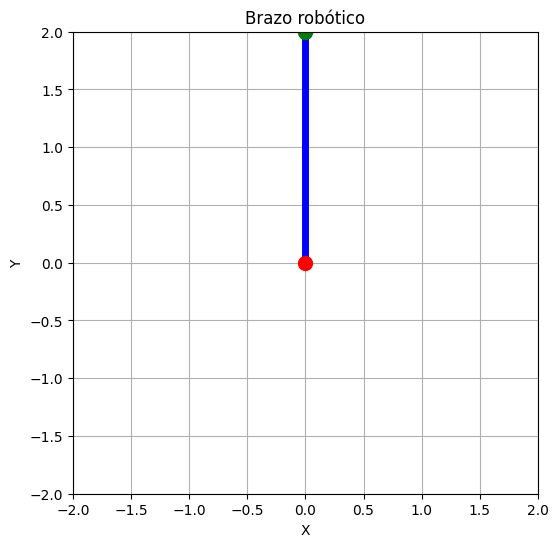

In [51]:
theta1 = np.deg2rad(90)  # 90 grados
theta2 = np.deg2rad(0)  # -0 grados
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

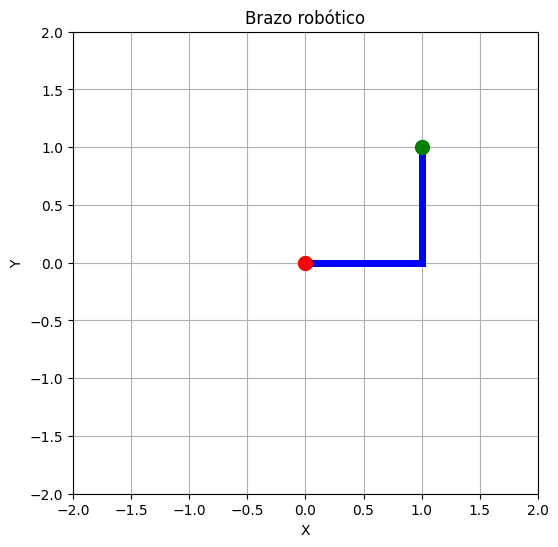

In [52]:
theta1 = np.deg2rad(0)  # 0 grados
theta2 = np.deg2rad(90)  # 90 grados
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

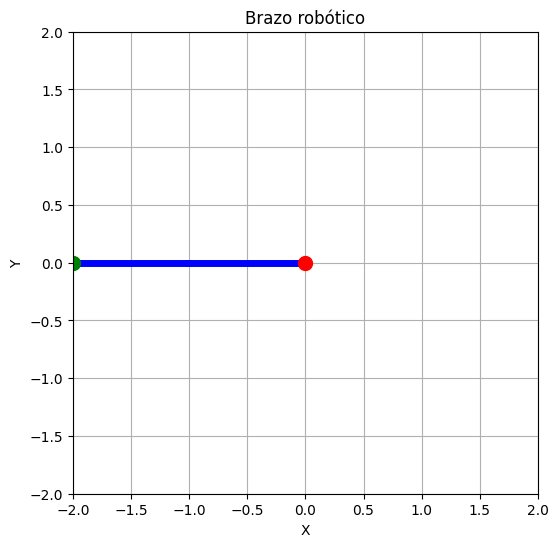

In [53]:
theta1 = np.deg2rad(180)  # 180 grados
theta2 = np.deg2rad(0)  # -0 grados
l1 = 1
l2 = 1
dibujar_brazo_mecanico(theta1, theta2, l1, l2)

Respuestas
1)
Para este punto, lo que hice fue cambiar los valores de los ángulos theta1 y theta2 en el código que se nos dio. Esto es como simular diferentes posiciones del brazo dependiendo de cómo se muevan las articulaciones. Algunas combinaciones que probé fueron:

(theta1 = 45°, theta2 = -80°): Esta fue la combinación del ejemplo, y hace que el brazo se estire primero en diagonal hacia arriba, y luego doble bruscamente hacia abajo.

(theta1 = 90°, theta2 = 0°): Con esto el brazo se va totalmente hacia arriba y se extiende en línea recta.

(theta1 = 0°, theta2 = 90°): El primer segmento va hacia la derecha y el segundo se dobla hacia arriba.

(theta1 = 180°, theta2 = 0°): El brazo se extiende completamente hacia la izquierda.


Cada combinación representa una posición distinta del brazo, y lo interesante es ver cómo con solo modificar esos dos ángulos, el extremo del brazo puede llegar a varios puntos distintos del plano.

respuesta
2)
definitivamente el brazo robotico puede alcanzar cualquier punto dentro de esa cuadrícula.

aca te pongo en contexto un ejemplo con unos puntos:

Imaginemos que el brazo está fijo en el punto (0, 0).

Cada uno de sus dos segmentos mide 2 unidades, así que si se estira completamente, su longitud total es 2 + 2 = 4 unidades.

La cuadrícula 2x2 mencionada está centrada en el origen y va de (-1, -1) a (1, 1), lo que significa que el punto más alejado que existe dentro de esa área está a una distancia de aproximadamente 1.41 unidades (que es la diagonal del cuadrado, raíz de 2).

Entonces, el brazo tiene mucho más alcance del que necesita para cubrir esa cuadrícula. De hecho, podría cubrir áreas mucho más grandes que esa.


Además, al cambiar los ángulos de las articulaciones (como vimos en el primer punto), el brazo puede tomar cualquier dirección y formar muchas posiciones diferentes, lo cual le da la flexibilidad suficiente para llegar a cualquier punto dentro de la cuadrícula sin problema.
